In [1]:
%matplotlib inline

# import gym
import gymnasium as gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict

if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv
from lib import plotting

matplotlib.style.use('ggplot')

0.0

In [6]:
env = BlackjackEnv()

In [16]:
def mc_prediction(policy, env, num_episodes, discount_factor=1.0):
    """
    Monte Carlo prediction algorithm. Calculates the value function
    for a given policy using sampling.
    
    Args:
        policy: A function that maps an observation to action probabilities.
        env: OpenAI gym environment.
        num_episodes: Number of episodes to sample.
        discount_factor: Gamma discount factor.
    
    Returns:
        A dictionary that maps from state -> value.
        The state is a tuple and the value is a float.
    """

    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    # The final value function
    V = defaultdict(float)
    
    # Implement this!

    # keep looping through episodes:
    for epi in range(num_episodes):

        # Print out which episode we're on, useful for debugging.
        if epi % 1000 == 0:
            print("\rEpisode {}/{}.".format(epi, num_episodes), end="")
            sys.stdout.flush()

        # initialize the environment to its initial state
        observation = env.reset()

        # optional: keep track of which states have appeared in the current episode,

        returns_in_current_episode = dict()


        # for each episode until a terminal state is reached:
        # following policy during the episode:
        while True: # keep going until the end of the epidsode:

            # action = np.argmax(policy(observation))
            action = policy(observation)
            observation_next, reward, done, _ = env.step(action)


            # for all obserations that have appeared before,
            # simply add the new discounted  to get culminulated
            # so far:
            for obs in returns_in_current_episode:
                num_of_steps_since_state_appeared = returns_in_current_episode[obs][1]
                returns_in_current_episode[obs] += np.array([reward*(discount_factor**num_of_steps_since_state_appeared), 1.0])


            if observation not in returns_in_current_episode:
                # set reward for new observation:
                returns_in_current_episode[observation] = np.array([reward, 1.0], dtype ='float64')
            
            
            # increase all count to end by one:
            # for obs_seen_in_epi in returns_in_current_episode:
            #     returns_in_current_episode[obs_seen_in_epi] += np.array([0, 1])

            observation = observation_next
            if done: 
                break

        # at the end of each episode, find the return:
        for obs in returns_in_current_episode:
            returns_sum[obs] += returns_in_current_episode[obs][0]
            returns_count[obs] += 1


    # at the end, calculate the average return on each first visit:
    for obs in returns_sum:
        if returns_count[obs] != 0:
            V[obs] = returns_sum[obs]/returns_count[obs]
        





    return V    

In [17]:
def sample_policy(observation):
    """
    A policy that sticks if the player score is > 20 and hits otherwise.
    """
    score, dealer_score, usable_ace = observation
    return 0 if score >= 20 else 1

Episode 9000/10000.

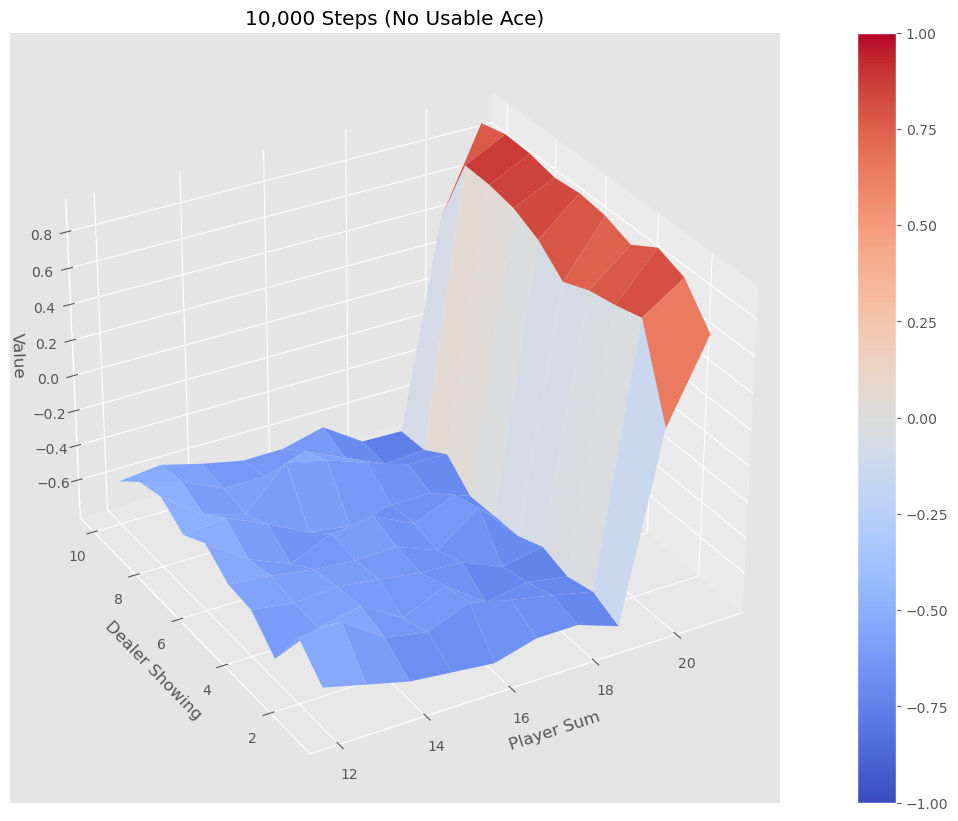

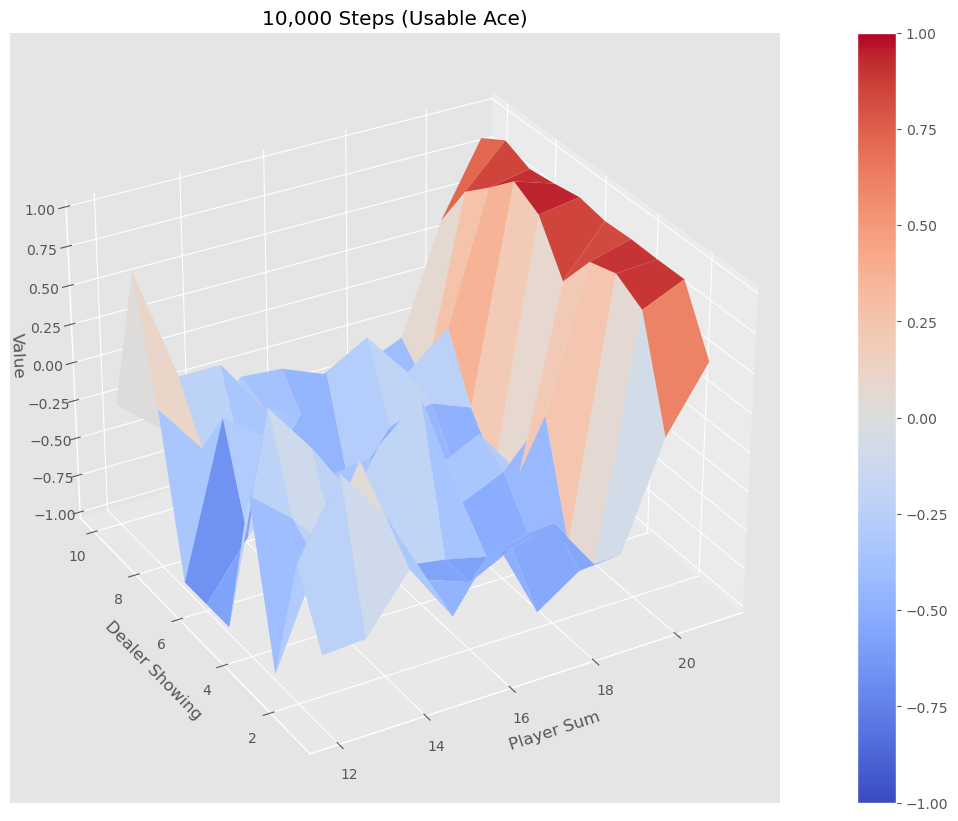

Episode 499000/500000.

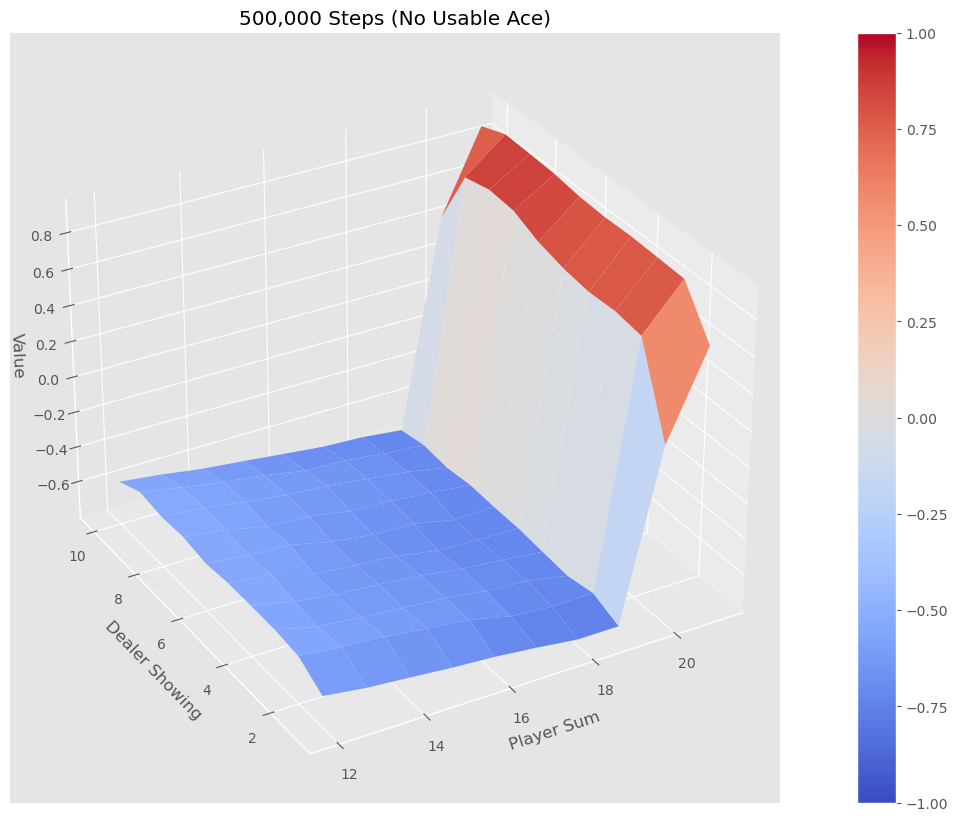

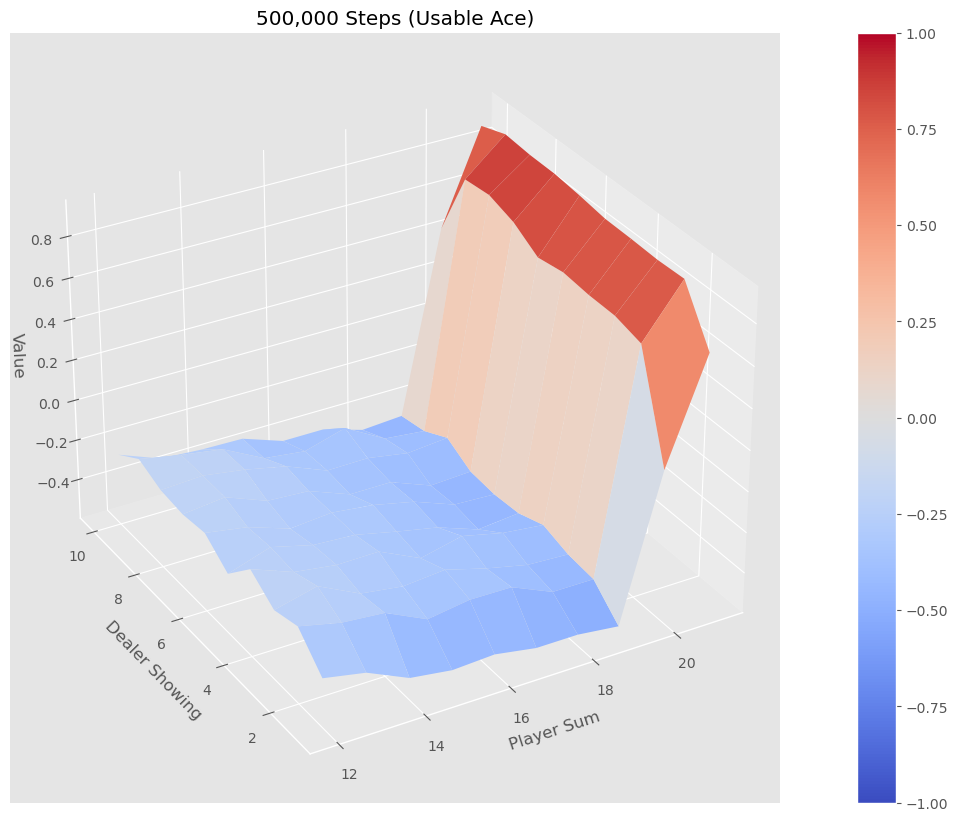

In [18]:
V_10k = mc_prediction(sample_policy, env, num_episodes=10000)
plotting.plot_value_function(V_10k, title="10,000 Steps")

V_500k = mc_prediction(sample_policy, env, num_episodes=500000)
plotting.plot_value_function(V_500k, title="500,000 Steps")